<a href="https://colab.research.google.com/github/m-mwangi/UzaziSafe/blob/main/Initial_Prototype_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA LOADING**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Maternal Health Data.csv to Maternal Health Data.csv


In [3]:
# Necessary Libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Maternal Health Data.csv")
df.head()

,Age,Systolic BP,Diastolic BP,Blood Sugar,Body Temp,Heart Rate,Previous Complications,Pre-existing Diabetes,Gestational Diabetes,Risk Level
0,22,90.0,60.0,9.0,100.0,80.0,Yes,Yes,No,High
1,22,110.0,70.0,7.1,98.0,74.0,No,No,No,Low
2,27,110.0,70.0,7.5,98.0,72.0,Yes,No,No,Low
3,20,100.0,70.0,7.2,98.0,74.0,No,No,No,Low
4,20,90.0,60.0,7.5,98.0,74.0,No,No,No,Low


In [4]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Dataset information
print("\nDataset Information:")
df.info()

# Summary statistics of the dataset
print("\nSummary Statistics:")
df.describe()

Dataset Shape: (3217, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3217 non-null   int64  
 1   Systolic BP             3212 non-null   float64
 2   Diastolic BP            3213 non-null   float64
 3   Blood Sugar             3215 non-null   float64
 4   Body Temp               3217 non-null   float64
 5   Heart Rate              3215 non-null   float64
 6   Previous Complications  3215 non-null   object 
 7   Pre-existing Diabetes   3215 non-null   object 
 8   Gestational Diabetes    3217 non-null   object 
 9   Risk Level              3199 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 251.5+ KB

Summary Statistics:


,Age,Systolic BP,Diastolic BP,Blood Sugar,Body Temp,Heart Rate
count,3217.000000,3212.000000,3213.000000,3215.000000,3217.000000,3215.000000
mean,26.926951,111.328144,73.032369,8.440507,98.595710,78.609331
std,11.320465,17.308710,13.748912,2.926767,1.133271,9.654764
min,10.000000,70.000000,40.000000,3.000000,97.000000,7.000000
25%,20.000000,100.000000,60.000000,6.800000,98.000000,70.000000
50%,24.000000,110.000000,70.000000,7.700000,98.000000,77.000000
75%,30.000000,120.000000,80.000000,10.000000,98.600000,86.000000
max,325.000000,200.000000,140.000000,19.000000,103.000000,120.000000


**DATA CLEANING**

*a) Handling missing values*

In [5]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Age                        0
Systolic BP                5
Diastolic BP               4
Blood Sugar                2
Body Temp                  0
Heart Rate                 2
Previous Complications     2
Pre-existing Diabetes      2
Gestational Diabetes       0
Risk Level                18
dtype: int64


- For numerical features (Systolic BP, Diastolic BP, Blood Sugar, Heart Rate), we'll use median to impute. This is because its robust to outliers, and preserves realistic central tendencies.

- For categorical features (Previous Complications, Pre-existing Diabetes) we'll use mode to impute. This is because the most frequent category, reflects the most dominant pattern in the data.

- Risk Level will not be imputed because it is the output variable which means it's not realiable as the model would just be guessing. Therefore, we'll drop those rows.

In [6]:
# Numeric features using median for imputation
for col in ["Systolic BP", "Diastolic BP", "Blood Sugar", "Heart Rate"]:
    df[col] = df[col].fillna(df[col].median())

# Categorical features using with mode for imputation
for col in ["Previous Complications", "Pre-existing Diabetes"]:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.dropna(subset = ["Risk Level"])

# Confirm all missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum())
print("\nNew shape:", df.shape)

Missing values after imputation:
Age                       0
Systolic BP               0
Diastolic BP              0
Blood Sugar               0
Body Temp                 0
Heart Rate                0
Previous Complications    0
Pre-existing Diabetes     0
Gestational Diabetes      0
Risk Level                0
dtype: int64

New shape: (3199, 10)


*b) Handling duplicate rows*

In [7]:
# Check for duplicate rows
print("Number of Duplicate Rows:", df.duplicated().sum())

Number of Duplicate Rows: 802


In [8]:
df = df.drop_duplicates(keep = "first")
print("Number of Duplicate Rows:", df.duplicated().sum())
print("\nNew shape:", df.shape)

Number of Duplicate Rows: 0

New shape: (2397, 10)


**VISUALIZATIONS**

*a) Histograms*

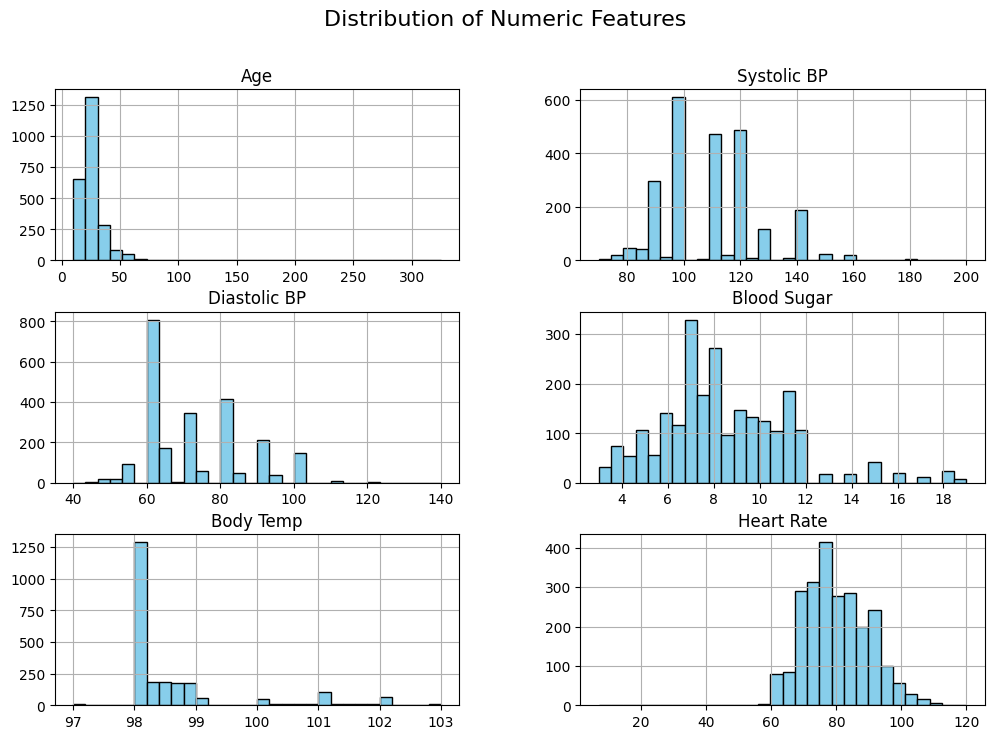

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["Age", "Systolic BP", "Diastolic BP", "Blood Sugar", "Body Temp", "Heart Rate"]

df[numeric_cols].hist(bins = 30, figsize = (12,8), color = 'skyblue', edgecolor = 'black')
plt.suptitle("Distribution of Numeric Features", fontsize = 16)
plt.show()

- Age - Most women fall between 20–40 years, with a sharp peak around 25–30. A few extreme outliers exist (very high ages, e.g., >100) which may be data entry errors (outliers).

- Systolic BP - The bulk lies between 90–130 mmHg, which is within normal ranges. Some high values >180 may indicate hypertensive conditions.

- Diastolic BP - Concentrated around 60–90 mmHg (normal), but a few cases exceed 120 (possible severe hypertension).

- Blood Sugar - Centered around 6–9 mmol/L, which is in line with expected levels. Some patients show very high values (>15), suggesting severe medical conditions like diabetes.

- Body Temp - Narrowly distributed around 98°F, which makes sense medically. Very few unusual values >102°F (possible fevers).

- Heart Rate - Most values are between 65–90 bpm, which is normal. However, there's an outlier of 7 which seems like a data error.

*b) Count Plots*

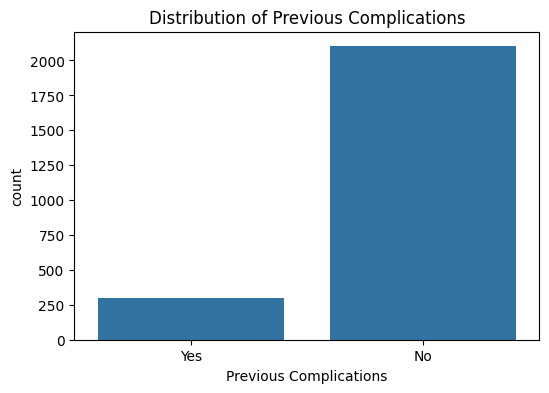

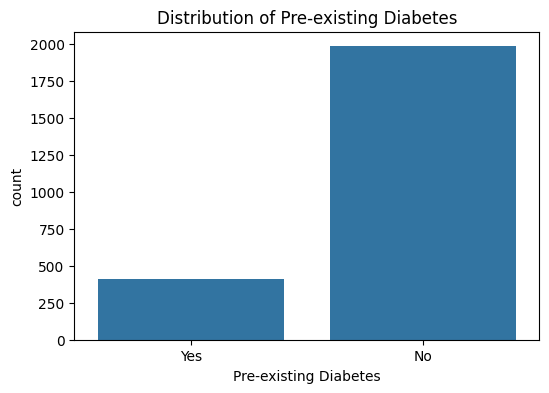

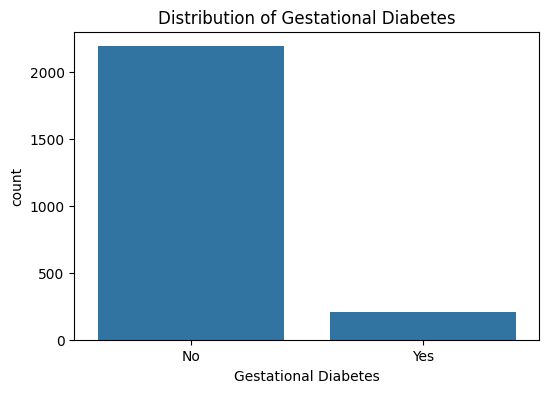

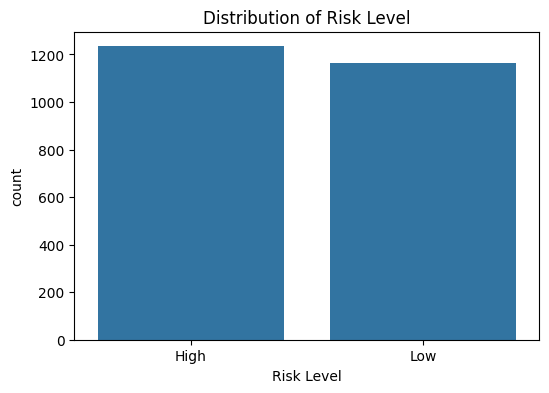

In [10]:
categorical_cols = ["Previous Complications", "Pre-existing Diabetes", "Gestational Diabetes", "Risk Level"]

for col in categorical_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(data = df, x = col)
    plt.title(f"Distribution of {col}")
    plt.show()

- Previous Complications - Majority had No complications, though a smaller but significant group had complications.

- Pre-existing Diabetes - Mostly No, with only a small portion Yes.

- Gestational Diabetes - Very few cases with Yes, most are No.

- Risk Level (Target Variable) - Nearly balanced dataset but with slightly more High Risk than Low Risk.



*c) Boxplots*


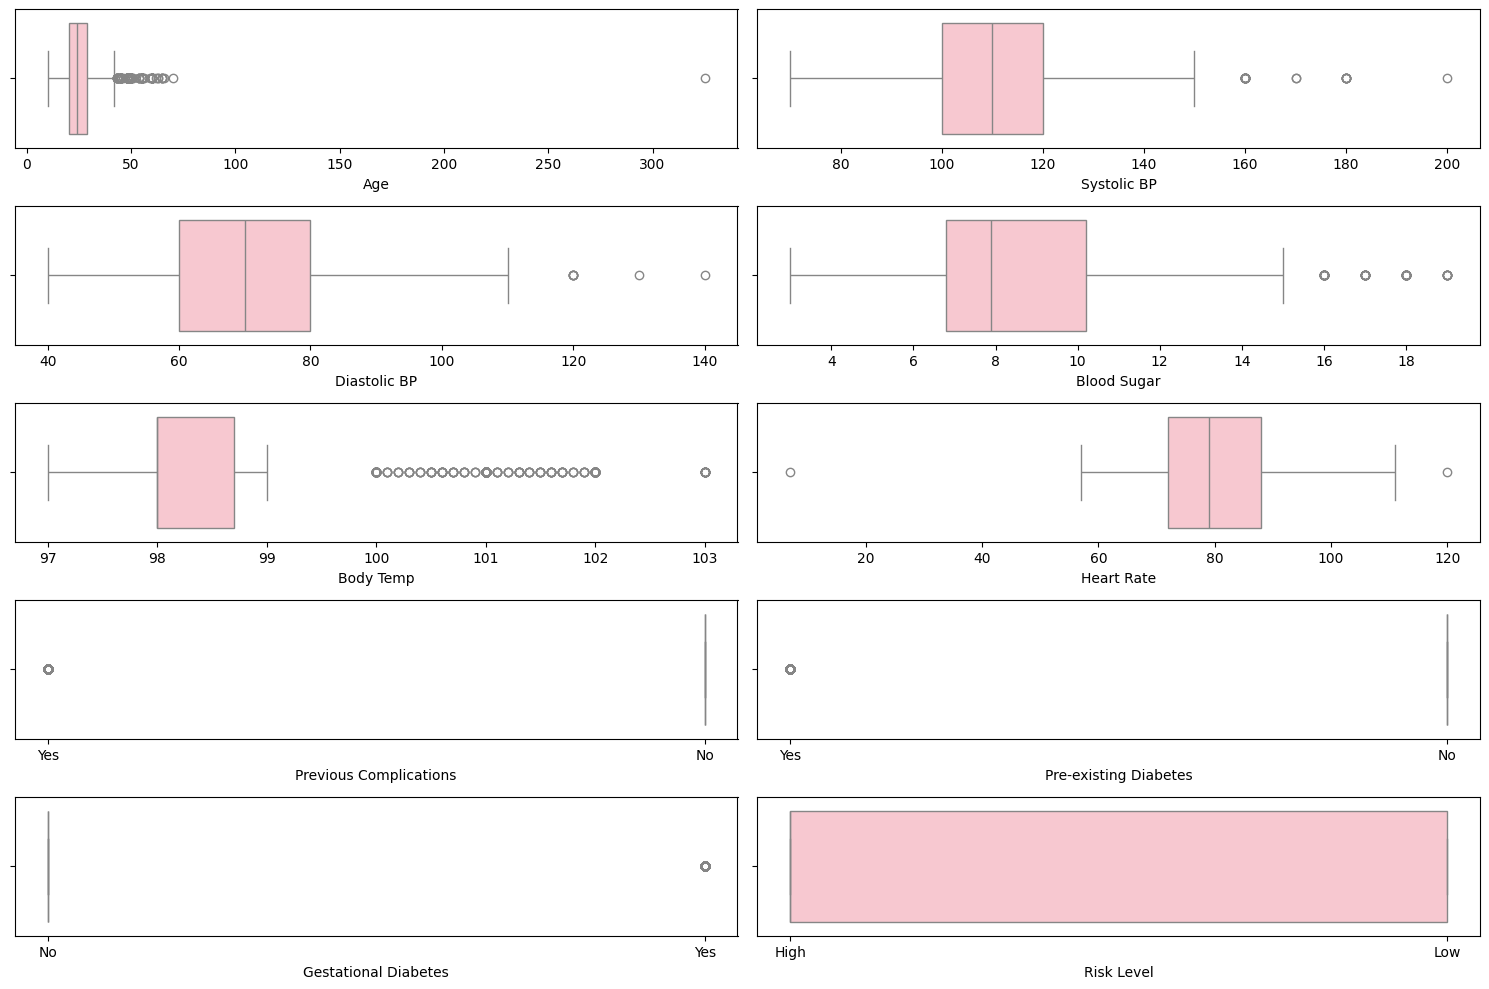

In [11]:
# Boxplots to visualize outliers for each feature
plt.figure(figsize = (15, 10))
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x = df[column], color = 'pink')
plt.tight_layout()
plt.show()

- The two extreme outliers we'll handle later on is in Age and Heart Rate, because an age of 325 or a heart rate of 7 is not medically realistic among pregnant women.

- The other features outlier values can be attributed to severe medical conditions, and therefore will be left alone to show variety in data.

*d) Pairplots*

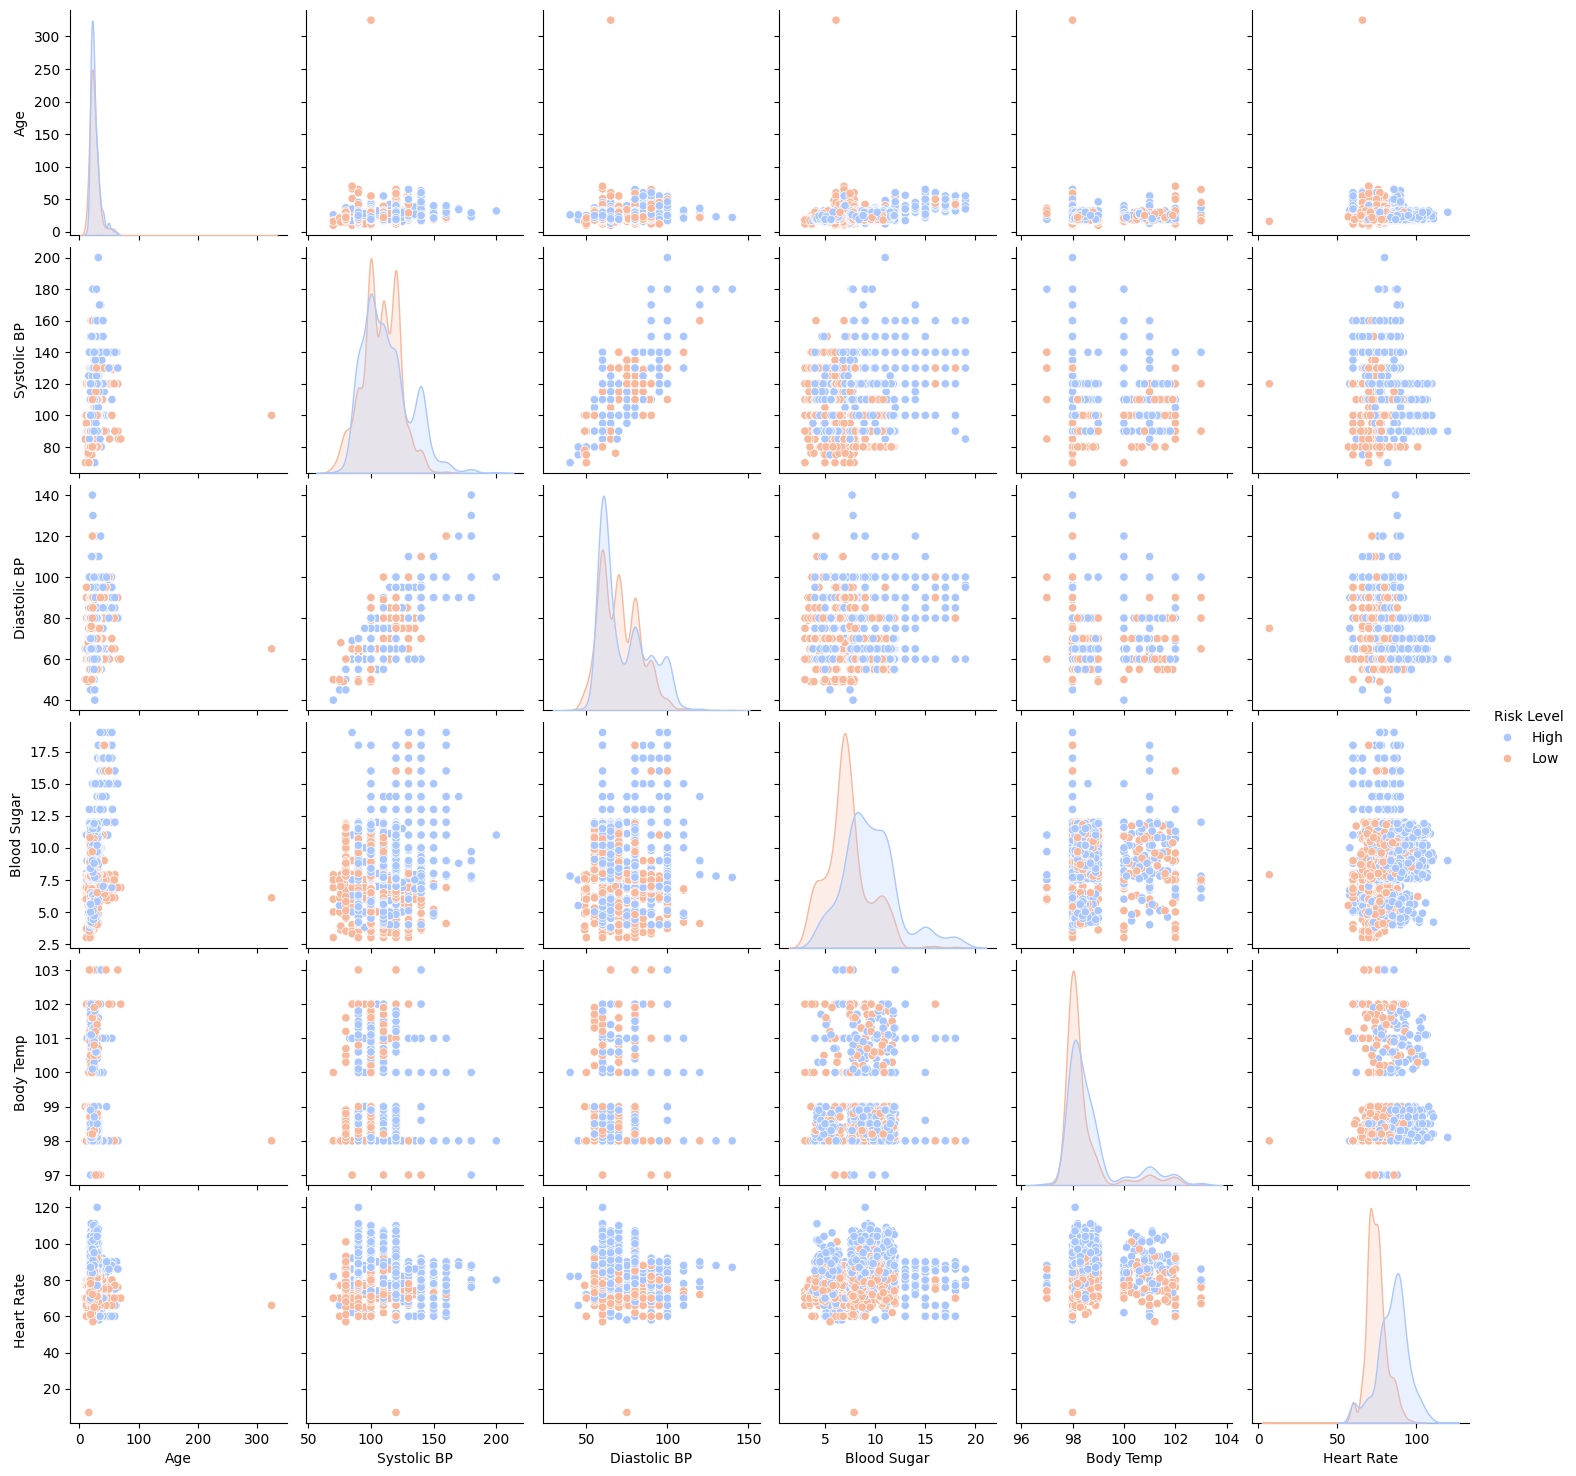

In [12]:
# Using pairplot to explore relationships between features
sns.pairplot(df, hue = "Risk Level", palette = "coolwarm", diag_kind = "kde", height = 2.5)
plt.show()

- Maternal risk seems most strongly associated with Blood Pressure and Blood Sugar levels. These variables show visible clustering of High Risk patients.

- Age, Heart Rate, and Body Temp provide supporting signals but not strong standalone indicators.

*e) Correlation Heatmap*

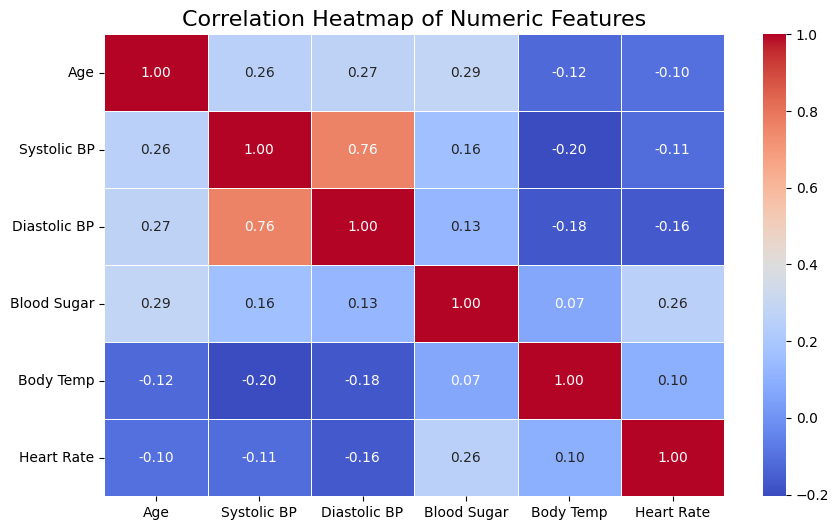

In [13]:
plt.figure(figsize = (10,6))
corr = df[["Age", "Systolic BP", "Diastolic BP", "Blood Sugar", "Body Temp", "Heart Rate"]].corr()

sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize = 16)
plt.show()

- Systolic and Diastolic BP are strongly correlated (0.76), as expected, while most other features show only weak to moderate relationships.

- Age, Blood Sugar, and BP display mild positive links, consistent with known maternal risk factors.

- Body Temperature and Heart Rate are largely independent of other features.

**DATA PRE-PROCESSING**

*a) Handling Outliers*

In [14]:
# Before cleaning
print("Before cleaning:", df.shape)

# Remove Heart Rate = 7
df = df[df["Heart Rate"] != 7]

# Remove Age = 325
df = df[df["Age"] != 325]

# After cleaning
print("After cleaning:", df.shape)

# Quick check on summary stats
print("\nSummary statistics after cleaning:")
df.describe()

Before cleaning: (2397, 10)
After cleaning: (2395, 10)

Summary statistics after cleaning:


,Age,Systolic BP,Diastolic BP,Blood Sugar,Body Temp,Heart Rate
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,25.847182,110.138205,71.876827,8.429737,98.609603,80.097704
std,8.617609,17.049087,13.682775,2.805994,1.086824,9.747590
min,10.000000,70.000000,40.000000,3.000000,97.000000,57.000000
25%,20.000000,100.000000,60.000000,6.800000,98.000000,72.000000
50%,24.000000,110.000000,70.000000,7.900000,98.000000,79.000000
75%,29.000000,120.000000,80.000000,10.200000,98.700000,88.000000
max,70.000000,200.000000,140.000000,19.000000,103.000000,120.000000


*b) Feature Encoding*

In [15]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset to avoid overwriting
df_encoded = df.copy()

# Binary categorical columns (Yes = 1, No = 0)
binary_cols = ["Previous Complications", "Pre-existing Diabetes", "Gestational Diabetes"]

for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({"Yes": 1, "No": 0})

# Encode target variable (Risk Level: High = 1, Low = 0)
df_encoded["Risk Level"] = df_encoded["Risk Level"].map({"High": 1, "Low": 0})

print(df_encoded[binary_cols + ["Risk Level"]].head())

   Previous Complications  Pre-existing Diabetes  Gestational Diabetes  \
0                       1                      1                     0   
1                       0                      0                     0   
2                       1                      0                     0   
3                       0                      0                     0   
4                       0                      0                     0   

   Risk Level  
0           1  
1           0  
2           0  
3           0  
4           0  


*c) Splitting Data*

In [21]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df_encoded.drop("Risk Level", axis = 1)
y = df_encoded["Risk Level"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Further split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

# Keep an unscaled copy
X_train_unscaled = X_train.copy()
X_val_unscaled = X_val.copy()
X_test_unscaled = X_test.copy()

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (1532, 9)
Validation Set Shape: (384, 9)
Test Set Shape: (479, 9)


*d) Feature Scaling*

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data, transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("After scaling (arrays):")
print("Training Set Shape:", X_train_scaled.shape)
print("Validation Set Shape:", X_val_scaled.shape)
print("Test Set Shape:", X_test_scaled.shape)

After scaling (arrays):
Training Set Shape: (1532, 9)
Validation Set Shape: (384, 9)
Test Set Shape: (479, 9)


**MODEL BUILDING**

**Traditional ML Algorithms**


*a) Logistic Regression*

Model Performance
Train Accuracy: 0.8505
Validation Accuracy: 0.8307
Test Accuracy: 0.8330

Train Log Loss: 0.3584
Validation Log Loss: 0.3997
Test Log Loss: 0.3883

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       232
           1       0.82      0.86      0.84       247

    accuracy                           0.83       479
   macro avg       0.83      0.83      0.83       479
weighted avg       0.83      0.83      0.83       479



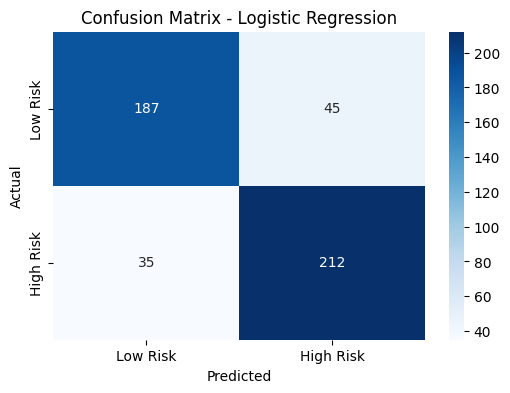

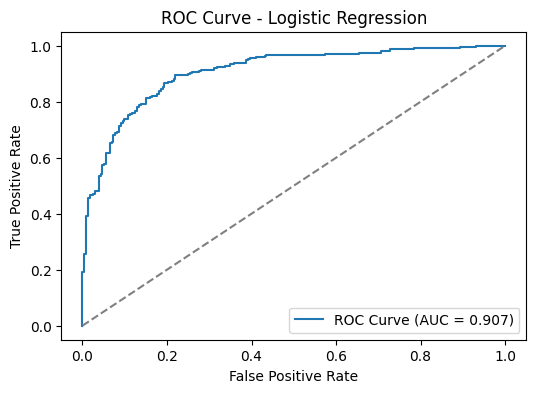

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, log_loss,
    roc_curve, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameters for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Initialize base model
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)

# Perform GridSearchCV
grid_search_logreg = GridSearchCV(log_reg, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search_logreg.fit(X_train_scaled, y_train)

# Get the best model
best_logreg = grid_search_logreg.best_estimator_

# Predictions with tuned model
y_train_pred = best_logreg.predict(X_train_scaled)
y_val_pred = best_logreg.predict(X_val_scaled)
y_test_pred = best_logreg.predict(X_test_scaled)

# Probabilities
y_train_prob = best_logreg.predict_proba(X_train_scaled)
y_val_prob = best_logreg.predict_proba(X_val_scaled)
y_test_prob = best_logreg.predict_proba(X_test_scaled)

# Model Performance Summary
print("Model Performance")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print(f"\nTrain Log Loss: {log_loss(y_train, y_train_prob):.4f}")
print(f"Validation Log Loss: {log_loss(y_val, y_val_prob):.4f}")
print(f"Test Log Loss: {log_loss(y_test, y_test_prob):.4f}")

# Classification Report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", xticklabels = ["Low Risk", "High Risk"], yticklabels = ["Low Risk", "High Risk"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_test, y_test_prob[:, 1])
fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle = "--", color = "gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

- This is my baseline model because it is simple interpretable and widely used for binary classification problems.

- Train, Validation and Test Accuracy values are consistent (0.83 - 0.85), which means my model is not underfitting or overfitting significantly.

- The precision and recall for high risk cases, show that the model is good at identifying high risk patients which is crucial for maternal risk prediction.

- Train, Test and Validation log loss (0.35 - 0.39) are also consistently lower, which means the model's probability predictions are not overconfident.

- Some misclassifications exist, but the high recall for High Risk (0.86) shows the model prioritizes not missing dangerous cases. This might be safer because its better to flag high risk pregnancies to prevent maternal mortalities.

- ROC Curve (AUC = 0.907): Shows strong separation between positive (high risk) and negative (low risk).

**Hyperparameter Tuning:**

- C balances model complexity, such that small values prevent overfitting, large values allow the model to fit more flexibly.

- solver determines the optimization algorithm, liblinear is good for small/binary problems, lbfgs scales better for larger datasets.

- Cross-validation ensures the selected hyperparameters generalize well across different subsets of data.

*b) XGBoost*

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Model Performance
Train Accuracy: 0.9537
Validation Accuracy: 0.8906
Test Accuracy: 0.9040

Train Log Loss: 0.1511
Validation Log Loss: 0.2402
Test Log Loss: 0.2434

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       232
           1       0.89      0.92      0.91       247

    accuracy                           0.90       479
   macro avg       0.90      0.90      0.90       479
weighted avg       0.90      0.90      0.90       479



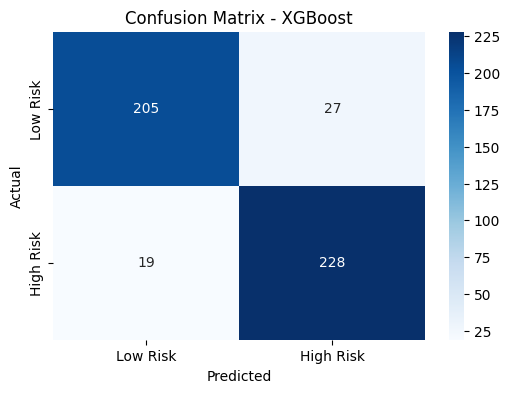

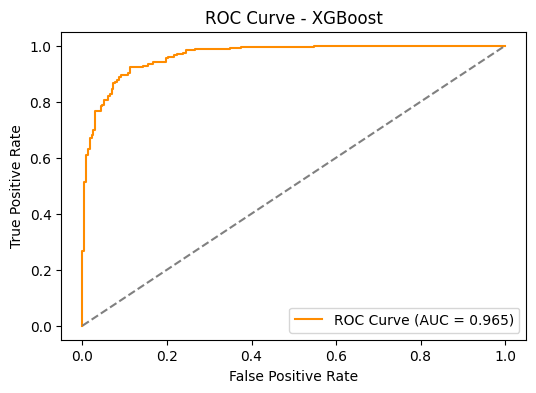

In [26]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, log_loss,
    roc_curve, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define Parameter Distribution
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [1, 1.5, 2, 3],
    'reg_alpha': [0, 0.1, 0.5, 1]
}

# Initialize Model
xgb_clf = xgb.XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    random_state = 42
)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator = xgb_clf,
    param_distributions = param_dist_xgb,
    n_iter = 30,
    cv = 3,
    scoring = 'accuracy',
    n_jobs = -1,
    random_state = 42,
    verbose = 1
)

# Fit on unscaled data
random_search_xgb.fit(X_train_unscaled, y_train)

# Best Model
best_xgb = random_search_xgb.best_estimator_

# Predictions
y_train_pred = best_xgb.predict(X_train_unscaled)
y_val_pred = best_xgb.predict(X_val_unscaled)
y_test_pred = best_xgb.predict(X_test_unscaled)

# Probabilities
y_train_prob = best_xgb.predict_proba(X_train_unscaled)
y_val_prob = best_xgb.predict_proba(X_val_unscaled)
y_test_prob = best_xgb.predict_proba(X_test_unscaled)

# Model Performance Summary
print("Model Performance")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print(f"\nTrain Log Loss: {log_loss(y_train, y_train_prob):.4f}")
print(f"Validation Log Loss: {log_loss(y_val, y_val_prob):.4f}")
print(f"Test Log Loss: {log_loss(y_test, y_test_prob):.4f}")

# Classification Report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Low Risk', 'High Risk'],
            yticklabels = ['Low Risk', 'High Risk'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_test, y_test_prob[:, 1])
fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC = {roc_auc:.3f})", color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

- This XGBoost model builds upon the baseline ensemble approach by using gradient boosting, which combines many weak learners (decision trees) to form a strong predictive model.

- Train, Validation, and Test accuracies (0.95, 0.89, 0.90) are well aligned, showing that the model generalizes effectively without major overfitting. The slightly higher training accuracy reflects XGBoost’s ability to fit the training data well while maintaining strong validation and test performance.

- The precision and recall for High Risk cases (Precision = 0.89, Recall = 0.92) demonstrate that the model effectively detects high-risk patients while keeping false alarms relatively low. The high recall is particularly valuable in maternal health contexts, where missing high-risk cases can have serious consequences.

- Train, Validation, and Test Log Loss values (0.15 – 0.24) are low and consistent, suggesting that the model’s probability estimates are reliable and not overconfident.

- While minor misclassifications exist, the strong recall for High Risk (0.92) confirms that the model is tuned toward sensitivity, prioritizing identification of risky pregnancies even if it means a few extra false positives. This bias toward safety is desirable in maternal risk prediction.

- ROC Curve (AUC = 0.965): The ROC curve shows excellent class separation between Low Risk and High Risk patients, confirming strong discriminative capability and a well-balanced decision boundary.

**Hyperparameter Tuning:**

RandomizedSearchCV was used to efficiently explore key XGBoost parameters:

- learning_rate controls the contribution of each tree to prevent overfitting.
- max_depth, subsample, and colsample_bytree regulate tree complexity and diversity.
- gamma, reg_lambda, and reg_alpha add regularization to penalize overly complex models.
- Cross-validation ensures that the selected configuration performs consistently across multiple folds.

*c) Random Forest*

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Model Performance Summary:
Train Accuracy: 0.9367
Validation Accuracy: 0.8802
Test Accuracy: 0.8789

Train Log Loss: 0.1771
Validation Log Loss: 0.2584
Test Log Loss: 0.2713

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       232
           1       0.86      0.92      0.89       247

    accuracy                           0.88       479
   macro avg       0.88      0.88      0.88       479
weighted avg       0.88      0.88      0.88       479



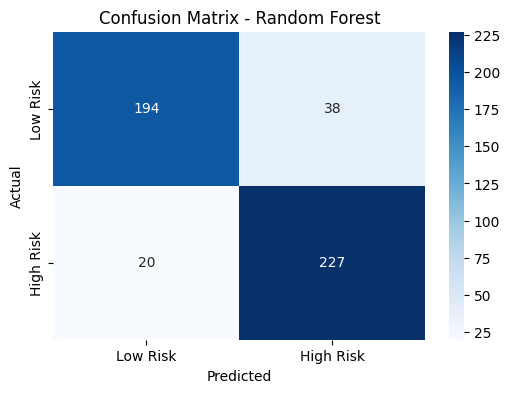

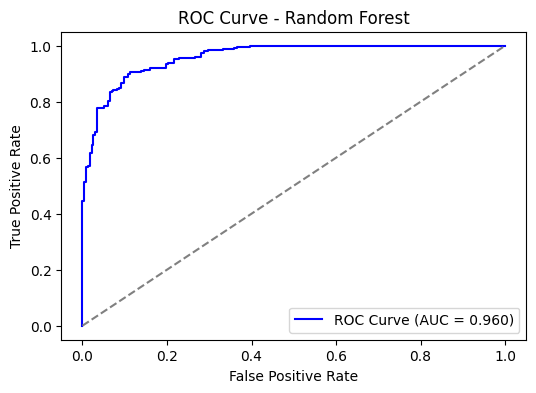

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define Parameter Distribution
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Model
rf = RandomForestClassifier(random_state = 42)

# Hyperparameter Tuning using Randomized Search
random_search_rf = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dist_rf,
    n_iter = 30,
    cv = 3,
    scoring = 'accuracy',
    n_jobs = -1,
    random_state = 42,
    verbose = 1
)

random_search_rf.fit(X_train_unscaled, y_train)

# Best Model
best_rf = random_search_rf.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train_unscaled)
y_val_pred = best_rf.predict(X_val_unscaled)
y_test_pred = best_rf.predict(X_test_unscaled)

# Probabilities
y_train_prob = best_rf.predict_proba(X_train_unscaled)
y_val_prob = best_rf.predict_proba(X_val_unscaled)
y_test_prob = best_rf.predict_proba(X_test_unscaled)

# Model Performance
print("Model Performance Summary:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print(f"\nTrain Log Loss: {log_loss(y_train, y_train_prob):.4f}")
print(f"Validation Log Loss: {log_loss(y_val, y_val_prob):.4f}")
print(f"Test Log Loss: {log_loss(y_test, y_test_prob):.4f}")

# Classification Report (Test Set)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Low Risk', 'High Risk'],
            yticklabels = ['Low Risk', 'High Risk'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_test, y_test_prob[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1])
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC = {roc_auc:.3f})", color = 'blue')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

- This Random Forest model serves as a strong baseline ensemble method because it handles non-linear relationships, reduces overfitting through bootstrapping, and is widely trusted for binary classification problems.

- Train, Validation, and Test accuracies (0.93, 0.88, 0.88) are closely aligned, suggesting the model generalizes well without major overfitting. It maintains a good balance between learning the training data and performing on unseen samples.

- The precision and recall for the High Risk class (Precision = 0.86, Recall = 0.92) indicate that the model effectively identifies high-risk patients while minimizing false negatives, crucial for maternal risk prediction tasks.

- Train, Validation, and Test Log Loss values (0.17 – 0.27) are low and consistent, showing that the model’s predicted probabilities are well-calibrated and not overconfident.

- Some misclassifications exist, but the high recall for High Risk (0.92) demonstrates a cautious bias toward flagging potential risk cases, a safer trade-off in healthcare contexts to prevent missed high-risk pregnancies.

- ROC Curve (AUC = 0.960): The high AUC value demonstrates excellent separation between Low Risk and High Risk cases, confirming strong discriminative power.

**Hyperparameter Tuning:**

RandomizedSearchCV was used to explore different hyperparameters efficiently. Parameters such as:

- n_estimators control the number of trees.
- max_depth, min_samples_split, and min_samples_leaf manage model complexity, and bootstrap adjusts sample diversity.
- Cross-validation ensures that the selected parameters generalize across folds and prevent overfitting.

**Deep Learning Models**

*a) Vanilla Neural Network*

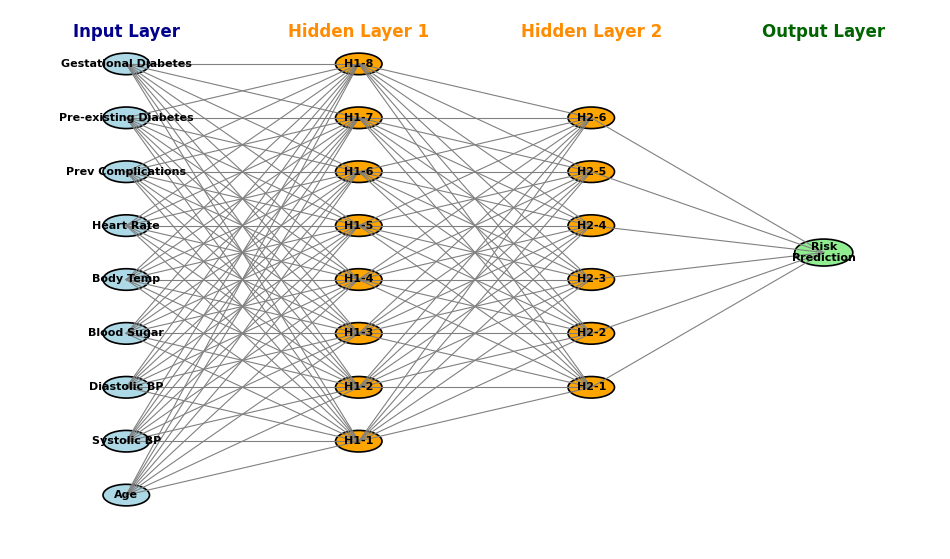

In [28]:
# Model Architecture
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_node(ax, center, radius, color, label = None):
    circle = patches.Circle(center, radius, color = color, ec = "black", lw = 1.2)
    ax.add_patch(circle)
    if label:
        ax.text(center[0], center[1], label, ha = 'center', va = 'center',
                fontsize = 8, fontweight = 'bold', color = 'black')

def draw_connection(ax, start, end):
    ax.plot([start[0], end[0]], [start[1], end[1]], color = "gray", lw = 0.8)

def visualize_pipeline():
    fig, ax = plt.subplots(figsize = (12, 7))
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 9)
    ax.axis('off')

    # Input Layer (9 features)
    input_nodes = [(0, y) for y in range(9)]
    input_features = [
        'Age', 'Systolic BP', 'Diastolic BP', 'Blood Sugar',
        'Body Temp', 'Heart Rate',
        'Prev Complications', 'Pre-existing Diabetes', 'Gestational Diabetes'
    ]
    for idx, node in enumerate(input_nodes):
        draw_node(ax, node, radius = 0.2, color = 'lightblue', label = input_features[idx])

    # Hidden Layer
    hidden1_nodes = [(2, y) for y in range(1, 9)]
    for idx, node in enumerate(hidden1_nodes):
        draw_node(ax, node, radius = 0.2, color = 'orange', label = f'H1-{idx+1}')

    # Hidden Layer 2
    hidden2_nodes = [(4, y) for y in range(2, 8)]
    for idx, node in enumerate(hidden2_nodes):
        draw_node(ax, node, radius = 0.2, color = 'orange', label = f'H2-{idx+1}')

    # Output Layer
    output_node = (6, 4.5)
    draw_node(ax, output_node, radius = 0.25, color = 'lightgreen', label = "Risk\nPrediction")

    # Connections
    for start in input_nodes:
        for end in hidden1_nodes:
            draw_connection(ax, start, end)

    for start in hidden1_nodes:
        for end in hidden2_nodes:
            draw_connection(ax, start, end)

    for start in hidden2_nodes:
        draw_connection(ax, start, output_node)

    # Titles
    ax.text(0, 8.5, 'Input Layer', ha = 'center', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    ax.text(2, 8.5, 'Hidden Layer 1', ha = 'center', fontsize = 12, fontweight = 'bold', color = 'darkorange')
    ax.text(4, 8.5, 'Hidden Layer 2', ha = 'center', fontsize = 12, fontweight = 'bold', color = 'darkorange')
    ax.text(6, 8.5, 'Output Layer', ha = 'center', fontsize = 12, fontweight = 'bold', color = 'darkgreen')

    plt.show()

visualize_pipeline()

This neural network takes 9 maternal health features as input, passes them through two hidden layers with ReLU activation, and outputs a binary risk prediction (Low vs High) using a sigmoid function. It is a step up from logistic regression because it captures non-linear feature interactions, improving flexibility in risk prediction.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6058 - loss: 0.6690 - val_accuracy: 0.7188 - val_loss: 0.5996
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7551 - loss: 0.5730 - val_accuracy: 0.7734 - val_loss: 0.5337
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8055 - loss: 0.4981 - val_accuracy: 0.8021 - val_loss: 0.4813
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8077 - loss: 0.4408 - val_accuracy: 0.8151 - val_loss: 0.4444
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252 - loss: 0.4017 - val_accuracy: 0.8255 - val_loss: 0.4227
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8402 - loss: 0.3784 - val_accuracy: 0.8359 - val_loss: 0.4094
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.3598 - val_accuracy: 0.8333 - val_loss: 0.4012
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8547 - loss: 0.3407 - val_accuracy: 0.8281 - val_loss

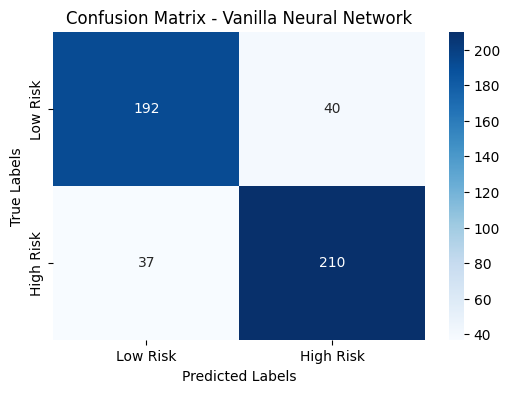

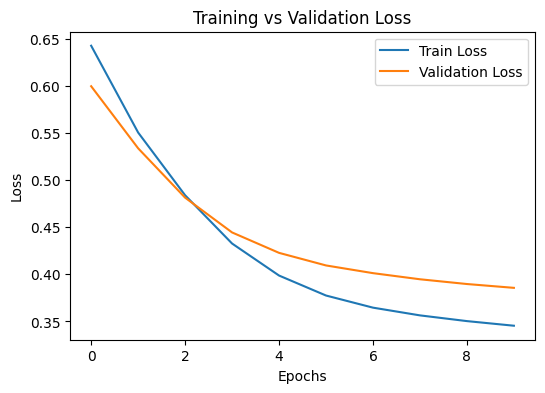

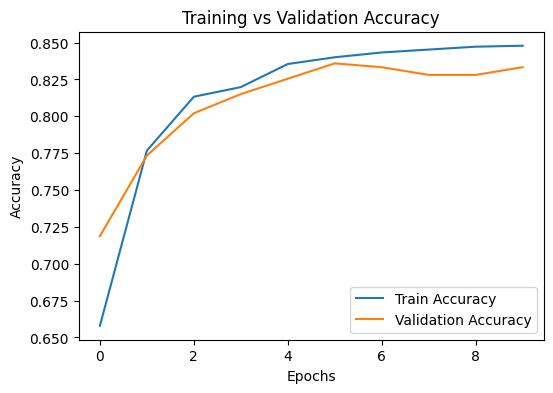

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Define Vanilla Neural Network
vanilla_model = Sequential([
    Dense(8, activation = 'relu', input_shape = (X_train.shape[1],)),  # Hidden Layer 1 (8 neurons)
    Dense(6, activation = 'relu'),                                   # Hidden Layer 2 (6 neurons)
    Dense(1, activation = 'sigmoid')                                 # Output Layer (binary)
])

vanilla_model.summary()

# Compile Model
vanilla_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

# Train Model
history = vanilla_model.fit(
    X_train_scaled, y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (X_val_scaled, y_val),
    verbose = 1
)


# Evaluate
test_loss, test_acc = vanilla_model.evaluate(X_test_scaled, y_test)
y_pred_probs = vanilla_model.predict(X_test_scaled)

# Predict class labels
y_pred_probs = vanilla_model.predict(X_test_scaled)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Metrics
print(f"\nTraining Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification Report
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Low Risk', 'High Risk'],
            yticklabels = ['Low Risk', 'High Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Vanilla Neural Network")
plt.show()

# Loss Curve
plt.figure(figsize = (6, 4))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Accuracy Curve
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

- This is a Vanilla Neural Network with 2 hidden layers (8 and 6 neurons, ReLU) and 1 output neuron (Sigmoid).

- The Train, Validation, Test Accuracies are closely consistent (0.83 - 0.84), but are slightly lower compared to traditional ML algorithms. However this neural network captures non-linear patterns and still generalizes well.

**Next Steps:**

- Improve with longer training, dropout, learning rate tuning, and deeper layers to see if the model perfomance will be improved.

*b) Optimized Neural Network*

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 96)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,665 (22.13 KB)

 Trainable params: 5,665 (22.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6905 - loss: 0.6634 - val_accuracy: 0.8385 - val_loss: 0.4767
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8301 - loss: 0.4776 - val_accuracy: 0.8385 - val_loss: 0.4384
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8491 - loss: 0.4314 - val_accuracy: 0.8359 - val_loss: 0.4312
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8603 - loss: 0.4059 - val_accuracy: 0.8411 - val_loss: 0.4236
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.4000 - val_accuracy: 0.8359 - val_loss: 0.4174
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8636 - loss: 0.3698 - val_accuracy: 0.8385 - val_loss: 0.4157
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8513 - loss: 0.4122 - val_accuracy: 0.8333 - val_loss: 0.4122
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.3729 - val_accuracy: 0.8333 - 

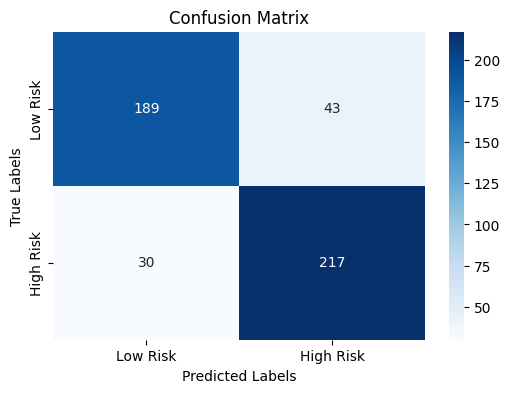

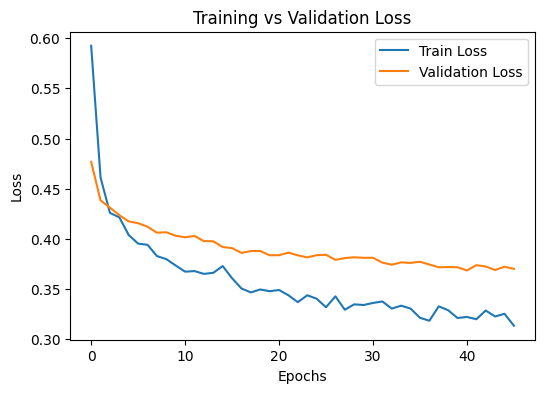

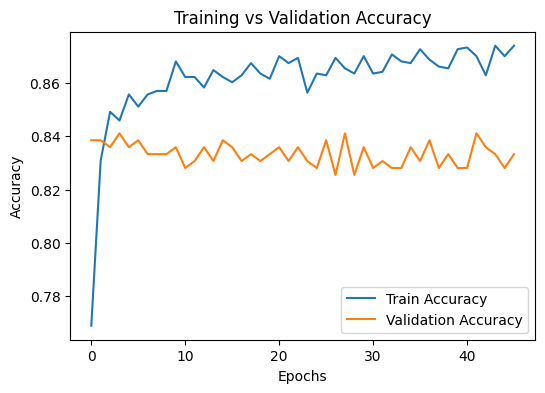

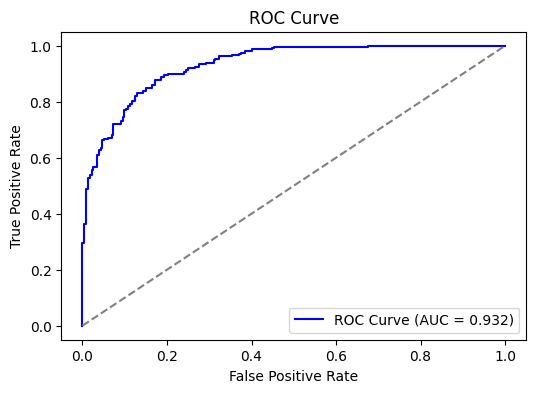

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


# Define Optimized Neural Network
tuned_model = Sequential([
    Dense(96, activation = 'relu', input_shape=(X_train.shape[1],), kernel_regularizer = keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(48, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

tuned_model.summary()

# Compile Model
optimizer = Adam(learning_rate = 0.001)
tuned_model.compile(optimizer = optimizer,
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Train Model
history = tuned_model.fit(
    X_train_scaled, y_train,
    epochs = 100,
    batch_size = 32,
    validation_data = (X_val_scaled, y_val),
    callbacks = [early_stop],
    verbose = 1
)

# Evaluate on Test Set
test_loss, test_acc = tuned_model.evaluate(X_test_scaled, y_test)

# Predict
y_pred_probs = tuned_model.predict(X_test_scaled).ravel()
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Metrics
print(f"\nTraining Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Loss Curve
plt.figure(figsize = (6, 4))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Accuracy Curve
plt.figure(figsize = (6, 4))
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color = "blue")
plt.plot([0, 1], [0, 1], linestyle = "--", color = "gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.show()

The optimized model has the following:

- Hidden Layer 1: Dense(96, ReLU) + Dropout(0.4)

- Hidden Layer 2: Dense(48, ReLU) + Dropout(0.2)

- Output Layer: Dense(1, Sigmoid)

This architecture balances model capacity with regularization, helping prevent overfitting.

The accuracies are closely related and slightly higher compared to the vanilla neural network, which means with tuning parameters has increased its perfomance.

ROC-AUC Score = 0.933, which shows excellent separation between classes, confirming strong discriminative power.

Loss Curve: Test loss is lower.

Balanced precision, recall, and F1-score across both risk classes.

**SAVING MODELS**

In [32]:
import joblib
from tensorflow.keras.models import save_model

# Save traditional ML models
joblib.dump(best_logreg, "logistic_model.pkl")
joblib.dump(best_rf, "random_forest_model.pkl")
joblib.dump(best_xgb, "xgboost_model.pkl")

# Save neural network models
vanilla_model.save("vanilla_nn_model.keras")
tuned_model.save("optimized_nn_model.keras")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print(" All models and scaler saved successfully!")


 All models and scaler saved successfully!


In [42]:
import joblib
import pandas as pd
from tensorflow.keras.models import load_model

# Load traditional ML models
best_logreg = joblib.load("logistic_model.pkl")
best_rf = joblib.load("random_forest_model.pkl")
best_xgb = joblib.load("xgboost_model.pkl")

# Load neural network models
vanilla_model = load_model("vanilla_nn_model.keras")
tuned_model = load_model("optimized_nn_model.keras")

# Load scaler
scaler = joblib.load("scaler.pkl")

# Store in a dictionary for easy iteration
models = {
    "Logistic Regression": best_logreg,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Vanilla Neural Network": vanilla_model,
    "Optimized Neural Network": tuned_model
}

print("All models and scaler loaded successfully!")

# Example patient data
new_data = pd.DataFrame([{
    'Age': 25,
    'Systolic BP': 110,
    'Diastolic BP': 70,
    'Blood Sugar': 5.5,
    'Body Temp': 98.6,
    'Heart Rate': 80,
    'Previous Complications': "No",
    'Pre-existing Diabetes': "No",
    'Gestational Diabetes': "No"
}])

# Convert categorical variables
binary_map = {"Yes": 1, "No": 0}
for col in ["Previous Complications", "Pre-existing Diabetes", "Gestational Diabetes"]:
    new_data[col] = new_data[col].map(binary_map)

print("Formatted Input Data:")
display(new_data)

def test_model(model_name, model, scaler, input_df):
    # Determine if scaling is needed
    if model_name in ["Logistic Regression", "Vanilla Neural Network", "Optimized Neural Network"]:
        input_data = scaler.transform(input_df)
    else:
        input_data = input_df

    # Handle Neural Networks
    if "Neural Network" in model_name:
        prob = model.predict(input_data).ravel()
        pred = (prob > 0.5).astype(int)
        prob_high = prob[0]
        prob_low = 1 - prob_high
    else:
        prob = model.predict_proba(input_data)
        pred = model.predict(input_data)
        prob_high = prob[0][1]
        prob_low = prob[0][0]

    risk_label = "High" if pred[0] == 1 else "Low"

    print(f"\n--- {model_name} ---")
    print(f"Predicted Risk Level: {risk_label}")
    print(f"Probability of High Risk: {prob_high:.2f}")
    print(f"Probability of Low Risk: {prob_low:.2f}")

for name, model in models.items():
    test_model(name, model, scaler, new_data)

All models and scaler loaded successfully!
Formatted Input Data:


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


,Age,Systolic BP,Diastolic BP,Blood Sugar,Body Temp,Heart Rate,Previous Complications,Pre-existing Diabetes,Gestational Diabetes
0,25,110,70,5.5,98.6,80,0,0,0



--- Logistic Regression ---
Predicted Risk Level: Low
Probability of High Risk: 0.22
Probability of Low Risk: 0.78

--- Random Forest ---
Predicted Risk Level: Low
Probability of High Risk: 0.41
Probability of Low Risk: 0.59

--- XGBoost ---
Predicted Risk Level: Low
Probability of High Risk: 0.17
Probability of Low Risk: 0.83
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

--- Vanilla Neural Network ---
Predicted Risk Level: Low
Probability of High Risk: 0.11
Probability of Low Risk: 0.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

--- Optimized Neural Network ---
Predicted Risk Level: Low
Probability of High Risk: 0.22
Probability of Low Risk: 0.78


From all the models we tested, XGBoost achieves the strongest predictive performance, with an accuracy of 0.90, a balanced precision and recall, low log loss and high AUC.

Therefore, this is the model we will use for our user interface.

**Testing XGBoost alone as our best model**

In [50]:
import joblib
import pandas as pd

# Load model and scaler
best_xgb = joblib.load("xgboost_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example patient
new_data = pd.DataFrame([{
    'Age': 25,
    'Systolic BP': 110,
    'Diastolic BP': 70,
    'Blood Sugar': 5.5,
    'Body Temp': 98.6,
    'Heart Rate': 80,
    'Previous Complications': "No",
    'Pre-existing Diabetes': "No",
    'Gestational Diabetes': "No"
}])

# Convert Yes/No to 1/0
binary_map = {"Yes": 1, "No": 0}
for col in ["Previous Complications", "Pre-existing Diabetes", "Gestational Diabetes"]:
    new_data[col] = new_data[col].map(binary_map)

y_pred = best_xgb.predict(new_data)
y_prob = best_xgb.predict_proba(new_data)

risk_label = "High" if y_pred[0] == 1 else "Low"
print(f"Predicted Risk Level: {risk_label}")
print(f"Probability of High Risk: {y_prob[0][1]:.2f}")
print(f"Probability of Low Risk: {y_prob[0][0]:.2f}")


Predicted Risk Level: Low
Probability of High Risk: 0.17
Probability of Low Risk: 0.83
